# Room modes

Sound that is reproduced in a closed enclosure like a room, can be proximated as a driven damped system. The room modes are the natural frequencies of the room and the sound we reproduce the exciter of these natural frequencies/modes

In [228]:
import matplotlib.pyplot as plt
import numpy as np

### define the dimensions of the room in meters

In [229]:
L = 5
W = 4
H = 3

### Define the first axial mode frequencies

For that I will use the symbols that typically are used such as F100 (1st axial on the Length axis) or f110 (first tangential on the L/D plane)

_In the following array the first 3 items are the axial modes._

In [230]:
mode = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
]

### Calculate the mode frequencies

In [231]:
# Function that calculates the frequency of each mode

def modeFrequency(L, W, H, mode):
    c = 343
    return (c/2) * np.sqrt( np.power((mode[0]/L),2) + np.power((mode[1]/W),2) + np.power((mode[2]/H),2) )

In [232]:
# Create a mode frequency array and calculate all mode frequencies

modeFrq = []

for m in mode:
    modeFrq.append(modeFrequency(L, W, H, m))

modeFrq = np.array(modeFrq)

### Calculate the frequency/amplitude curve (aka resonance curve)

In [233]:
# Define the frequency range in Hz
f = np.linspace(10, 2000, 10000)

# Define the function that calculates the resonance curve
def resonanceCurve(naturalFrequency, b ,m , frequencies):
    output = []
    
    for f in frequencies:
        output.append( 1 / np.sqrt( np.power(m, 2) * np.power( np.power(naturalFrequency, 2) - np.power(f, 2) , 2) + np.power(b*f,2)) )
    
    output = np.array(output)
    
    return output


In [234]:
# Calculate the resonance curves
resCurve = []

for mf in modeFrq:
    a = resonanceCurve(mf, 0.05, 0.004, f)
    resCurve.append(a/max(a))
    


### Calculate the energy transmission factor
In simple terms, calculate how much each mode contributes based on where the microphone is placed. If the microphone for instance is placed on a node then the mode will not contribute any energy to the total received by the mic. If it is placed on an antinode, then the maximum energy will be contributed.

In [235]:
# using as reference the bottom left corner with coordinates [0, 0, 0] I will choose two points. One on the reference and one on the back wall of the Length axial

pointA = [0, 0, 0]
pointB = [0, 0.3, 0.5]

In [236]:
def calculateFactors(p):
    return [ 0.5*(np.cos(2*np.pi * p[0]) + 1), 0.5*(np.cos(2*np.pi * p[1]) + 1), 0.5*(np.cos(2*np.pi * p[2]) + 1)]

factorsA = calculateFactors(pointA)
factorsB = calculateFactors(pointB)

In [237]:
print(factorsA)
print(factorsB)

[1.0, 1.0, 1.0]
[1.0, 0.34549150281252633, 0.0]


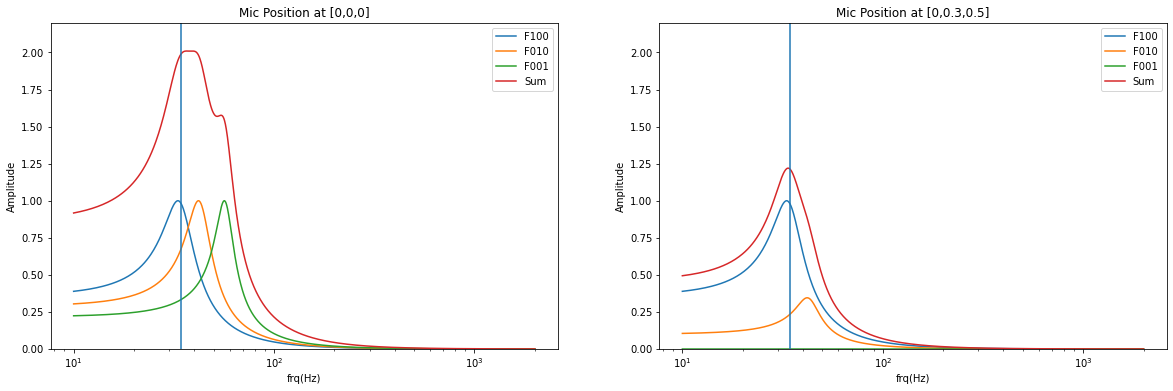

In [247]:

plt.figure(figsize=[20, 6])
plt.xlim(10, max(f))

plt.subplot(1,2,1)
plt.title("Mic Position at [0,0,0]")
plt.semilogx(f, factorsA[0]*resCurve[0])
plt.semilogx(f, factorsA[1]*resCurve[1])
plt.semilogx(f, factorsA[2]*resCurve[2])
plt.semilogx(f, factorsA[2]*resCurve[2] + factorsA[1]*resCurve[1] + factorsA[0]*resCurve[0])
plt.axvline(modeFrq[0])
plt.legend(["F100", "F010", "F001", "Sum"])
plt.xlabel("frq(Hz)")
plt.ylabel("Amplitude")
plt.ylim(0, 2.2)

plt.subplot(1,2,2)
plt.title("Mic Position at [0,0.3,0.5]")
plt.semilogx(f, factorsB[0]*resCurve[0])
plt.semilogx(f, factorsB[1]*resCurve[1])
plt.semilogx(f, factorsB[2]*resCurve[2])
plt.semilogx(f, factorsB[2]*resCurve[2] + factorsB[1]*resCurve[1] + factorsB[0]*resCurve[0])
plt.axvline(modeFrq[0])
plt.legend(["F100", "F010", "F001", "Sum"])
plt.ylim(0, 2.2)

plt.xlabel("frq(Hz)")
plt.ylabel("Amplitude")
plt.show()